In [27]:
import os  # operating system
import csv
import numpy as np
import matplotlib.pyplot as plt

# print current working directory
os.getcwd()

'/Users/eranagmon/code/notebook_tests'

In [25]:
# place holder for times and populations
times = []
population_size = []

with open('co-culture_data/Bac_L species.csv') as file:
    # create the csv reader
    csv_reader = csv.reader(file)

    # skip the header
    next(csv_reader)

    # iterate over the rows
    for row in csv_reader:
        # get the time and population size from this row, append it to the lists
        times.append(row[0])
        population_size.append(row[1])

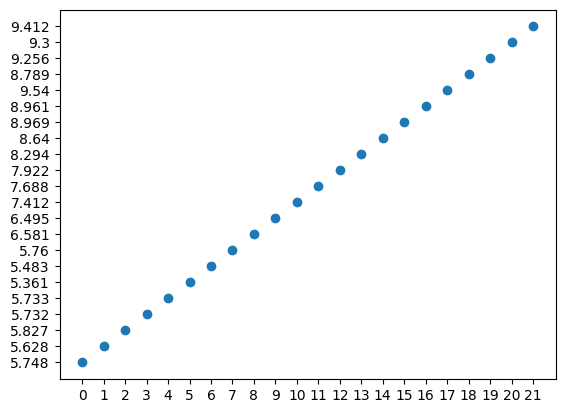

In [26]:
plt.scatter(times, population_size)

In [30]:
species_names = ['Bac_L species', 'Bac_H alvei']

# place holder for times and populations
species_data = {species: {
    'times': [],
    'population': [],
} for species in species_names}

for species in species_names:

    # get the csv for this species
    with open(f'co-culture_data/{species}.csv') as file:
        csv_reader = csv.reader(file)
        next(csv_reader)
        for row in csv_reader:
            species_data[species]['times'].append(row[0])
            species_data[species]['population'].append(row[1])

In [31]:
print(species_data)

{'Bac_L species': {'times': ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21'], 'population': ['5.748', '5.628', '5.827', '5.732', '5.733', '5.361', '5.483', '5.76', '6.581', '6.495', '7.412', '7.688', '7.922', '8.294', '8.64', '8.969', '8.961', '9.54', '8.789', '9.256', '9.3', '9.412']}, 'Bac_H alvei': {'times': ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21'], 'population': ['5.999', '6.034', '6.043', '6.095', '5.983', '6.347', '6.07', '6.27', '6.702', '7.636', '8.103', '8.285', '8.423', '8.484', '8.537', '8.641', '8.633', '8.728', '8.581', '8.737', '8.695', '8.712']}}


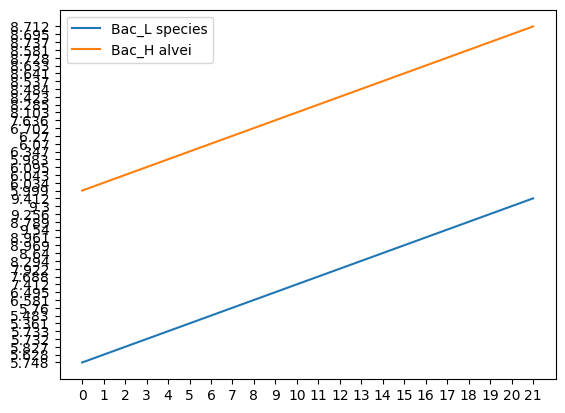

In [34]:
# plot
plt.figure()

# d.keys() will iterate over the keys
# d.values() will iterate over the values
# d.items() will iterate over both

for species, data in species_data.items():
    times = data['times']
    population = data['population']
    plt.plot(times, population, label=species)

plt.legend()
plt.show()


In [72]:
from scipy.integrate import odeint
from scipy.optimize import curve_fit

help(curve_fit)

Help on function curve_fit in module scipy.optimize._minpack_py:

curve_fit(f, xdata, ydata, p0=None, sigma=None, absolute_sigma=False, check_finite=None, bounds=(-inf, inf), method=None, jac=None, *, full_output=False, nan_policy=None, **kwargs)
    Use non-linear least squares to fit a function, f, to data.
    
    Assumes ``ydata = f(xdata, *params) + eps``.
    
    Parameters
    ----------
    f : callable
        The model function, f(x, ...). It must take the independent
        variable as the first argument and the parameters to fit as
        separate remaining arguments.
    xdata : array_like
        The independent variable where the data is measured.
        Should usually be an M-length sequence or an (k,M)-shaped array for
        functions with k predictors, and each element should be float
        convertible if it is an array like object.
    ydata : array_like
        The dependent data, a length M array - nominally ``f(xdata, ...)``.
    p0 : array_like, optional

In [104]:
NUM_SPECIES = len(species_names)

def generalized_lotka_volterra(t, *params):
    growth_rates = np.array(params[:NUM_SPECIES])
    interactions = np.array(params[NUM_SPECIES:]).reshape((NUM_SPECIES, NUM_SPECIES))

    # initial_pop = initial
    def model(populations, t):
        dX = []
        for i, x in enumerate(populations):
            dx = growth_rates[i]*x
            
            interaction = 0
            for j in range(NUM_SPECIES):
                interaction += interactions[i][j]*x*populations[j]
    
            dx += interaction
            dX.append(dx)
        return dX

    solution = odeint(model, initial_populations, t)
    return solution

In [105]:
# reformat the data into numpy arrays so that curve_fit
time_data = np.array(species_data[species_names[0]]['times'])

population_data = np.zeros((len(time_data), len(species_names)))
for i, species in enumerate(species_names):
    population_data[:, i] = species_data[species]['population']

In [106]:
initial_populations = [6, 6]  # the inital state

guess = [1 for _ in range(NUM_SPECIES)] + [0]*(NUM_SPECIES*NUM_SPECIES)

In [107]:
guess

[1, 1, 0, 0, 0, 0]

In [109]:
population_data_flattened = population_data.flatten()

params, cov = curve_fit(generalized_lotka_volterra, time_data, population_data_flattened, p0=guess)

ValueError: operands could not be broadcast together with shapes (22,2) (44,) 